First few rows of the dataset


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


/n Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
/n Missing values: 
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
/n Shape of X_train:  (240, 105)
Shape of X_test:  (61, 105)
Shape y_train:  (240,)
Shape of y_test:  (61,)
/n Model 

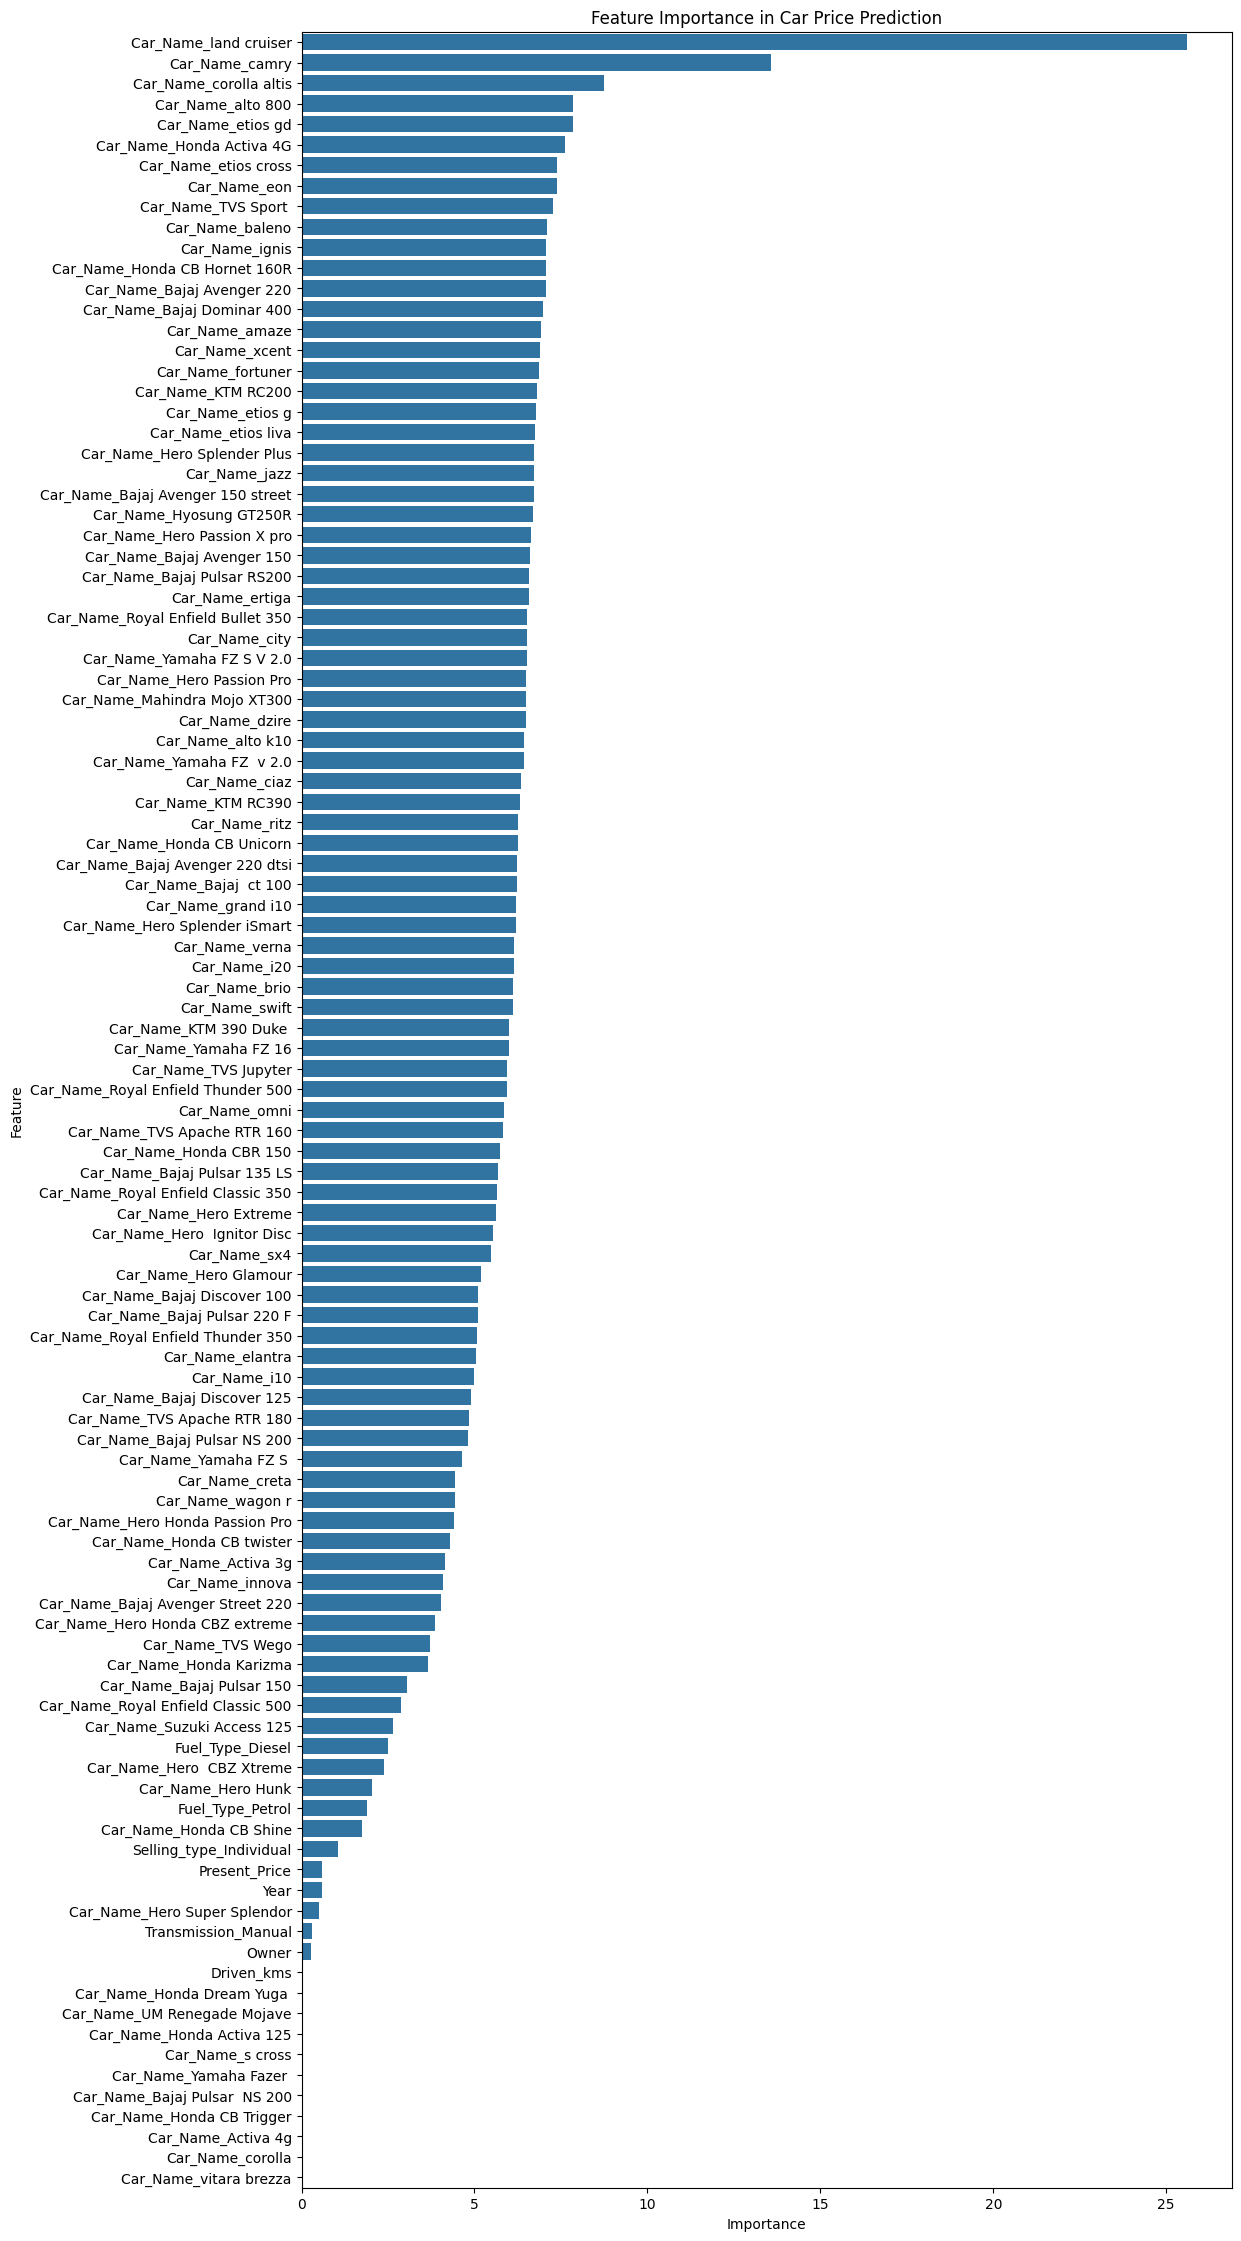

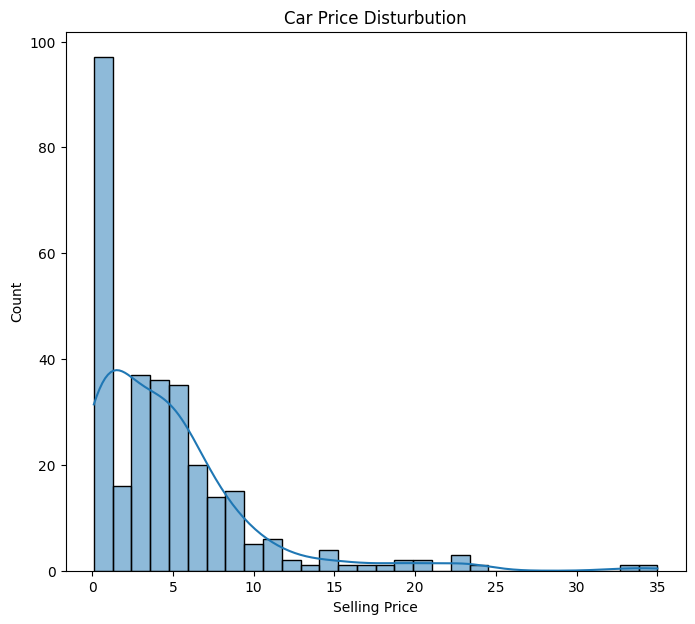

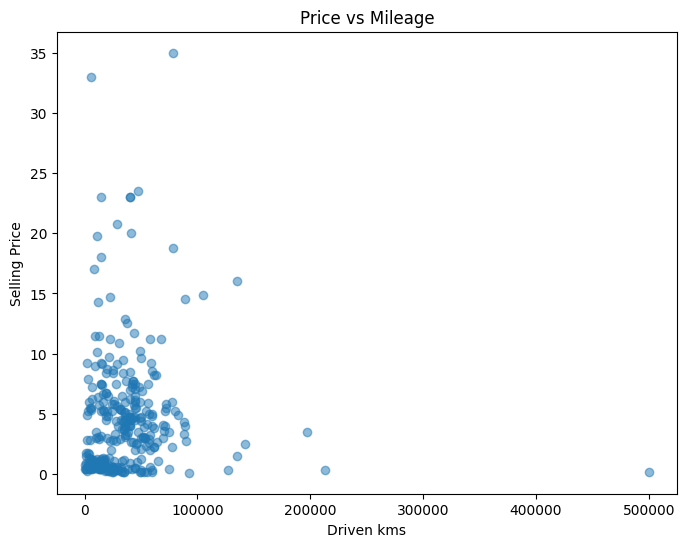

/n Random Forest Model Evaluation: 
Mean Squared Error:  0.7099997793442622
R² Score: 0.969178130525888


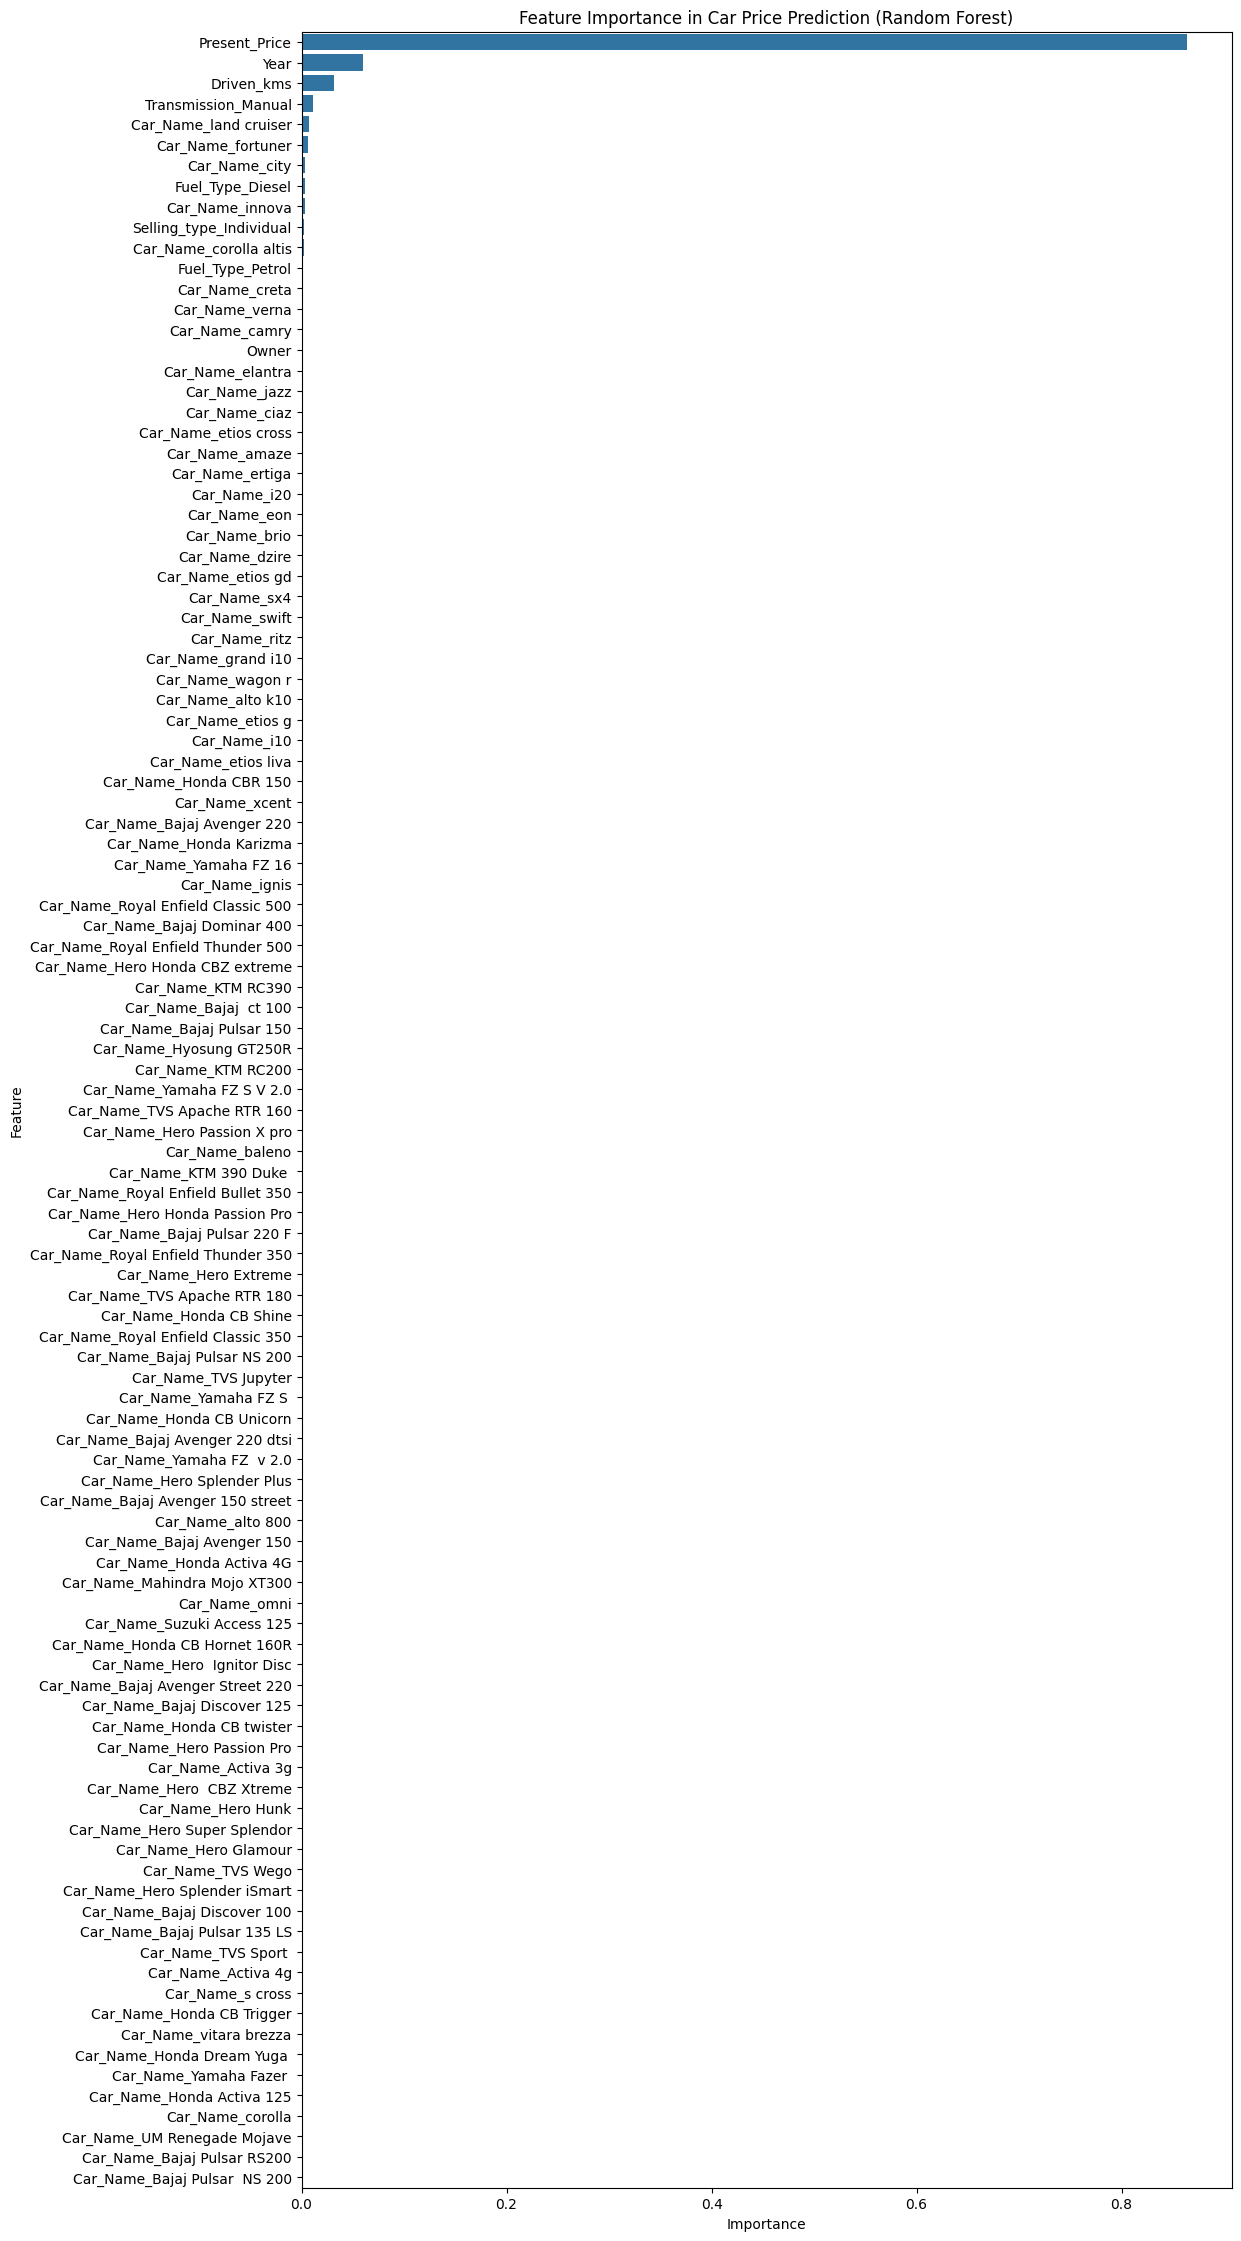

              Model  R² Score  Mean Squared Error
0  Linear Regresion  0.599702             9.22109
1     Random Forest  0.969178             0.71000


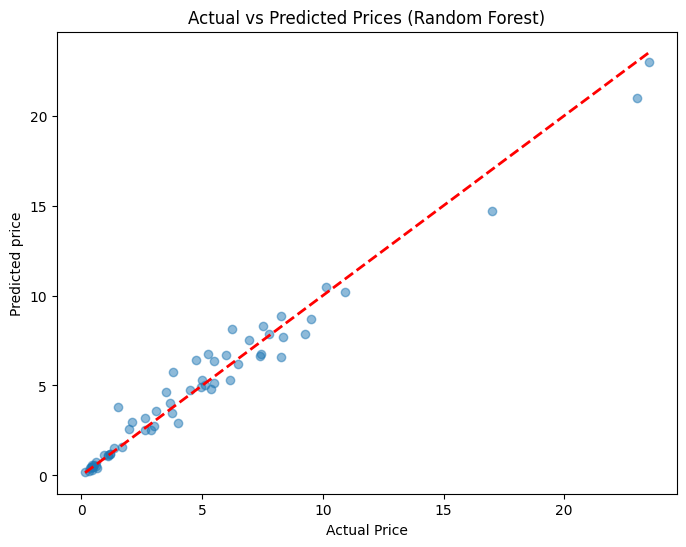

/n Average Selling Price by Fuel Type: 
Fuel_Type
CNG        3.100000
Diesel    10.278500
Petrol     3.264184
Name: Selling_Price, dtype: float64


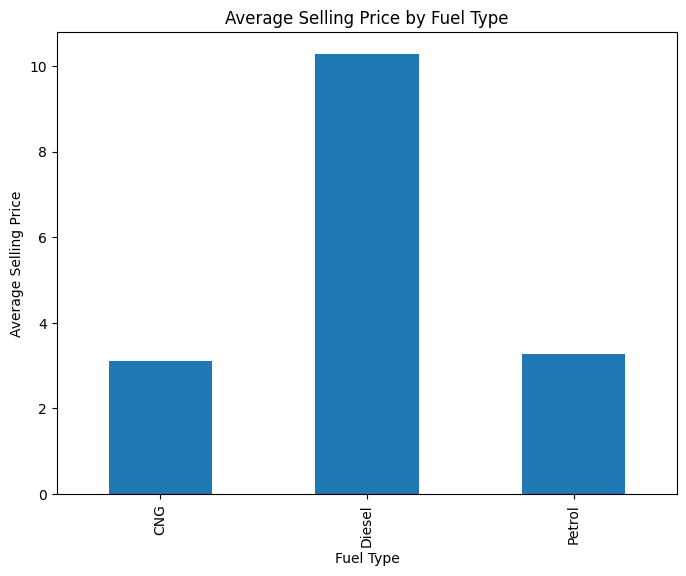

/n Best Parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
R² Score with Best Model: 0.966884220858937
Gradient Boosting R² Score: 0.9617393666500765

XGBRegressor Model Evaluation:
Mean Squared Error: 0.9347869804552308
R² Score: 0.9594198714761568


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


# Load dataset
data_path = 'Data/car data.csv'
df = pd.read_csv(data_path)

# Display few first rows
print('First few rows of the dataset')
display(df.head())

# Basic information
print('/n Dataset information')
print(df.info())

#check for missing values
print('/n Missing values: ')
print(df.isnull().sum())

# Preprocessing: Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type','Transmission', 'Car_Name'], drop_first=True)

# Define features (X) and target (Y)
X = df.drop('Selling_Price', axis=1) # All columns except sales price
y = df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the splits
print('/n Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('/n Model Evaluation: ')
print('Mean Squared Error: ', mse)
print("R² Score:", r2)

# Feature importance based on coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 28))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Car Price Prediction')
plt.savefig('figures/feature_importance.png')
plt.show()

# Price Disturbution
plt.figure(figsize=(8, 7))
sns.histplot(y, bins=30, kde=True)
plt.title('Car Price Disturbution')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.savefig('figures/price_disturbution.png')
plt.show()

# Scatter Plot: Price vs Driven_kms
plt.figure(figsize=(8, 6))
plt.scatter(df['Driven_kms'], df['Selling_Price'], alpha=0.5)
plt.title('Price vs Mileage')
plt.xlabel('Driven kms')
plt.ylabel('Selling Price')
plt.savefig('figures/scatter_plot.png')
plt.show()

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('/n Random Forest Model Evaluation: ')
print('Mean Squared Error: ', mse_rf)
print("R² Score:", r2_rf)

# Feature importance from Random Forest
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 28))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Feature Importance in Car Price Prediction (Random Forest)')
plt.savefig('figures/feature_importance_rf.png')
plt.show()

# Simple table to compare linear regression and random forest
results = pd.DataFrame({
    'Model': ['Linear Regresion', 'Random Forest'],
    'R² Score': [r2, r2_rf],
    'Mean Squared Error': [mse, mse_rf]
})
print(results)

# How close are the predictions to the actual values?
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.savefig('figures/actual_vs_predicted.png')
plt.show()

# Average price by Fuel_Type or Transmission
original_df = pd.read_csv('Data/car data.csv') # Original dataset without dummies
avg_price_fuel = original_df.groupby('Fuel_Type')['Selling_Price'].mean()
print('/n Average Selling Price by Fuel Type: ')
print(avg_price_fuel)

plt.figure(figsize=(8, 6))
avg_price_fuel.plot(kind='bar')
plt.title('Average Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.savefig('figures/avg_price_fuel.png')
plt.show()

# Optimization with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('/n Best Parameters: ', grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
print('R² Score with Best Model:', r2_best)

# More complex model: use GradientBoostingRegressor or XGBRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting R² Score:", r2_score(y_test, y_pred_gb))

# Initialize and train XGBRegressor model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("\nXGBRegressor Model Evaluation:")
print("Mean Squared Error:", mse_xgb)
print("R² Score:", r2_xgb)

# Feature importance from XGBRegressor
feature_importance_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 28))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb)
plt.title('Feature Importance in Car Price Prediction (XGBRegressor)')
plt.savefig('figures/feature_importance_xgb.png')
plt.show()

# Update the results table with all models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBRegressor'],
    'R² Score': [r2, r2_rf, r2_score(y_test, y_pred_gb), r2_xgb],
    'Mean Squared Error': [mse, mse_rf, mean_squared_error(y_test, y_pred_gb), mse_xgb]
})
print("\nUpdated Model Comparison:")
print(results)